# Insurance Claims- Fraud Detection

###### Problem Statement:

#### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### imported Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
df=pd.read_csv('insurance.csv')

In [6]:
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
#shape of dataset
df.shape

(1000, 40)

1000 rows and 40 columns

In [15]:
#checking datatype in dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#varibales in dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
#Check Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, _c39]
Index: []
Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capita

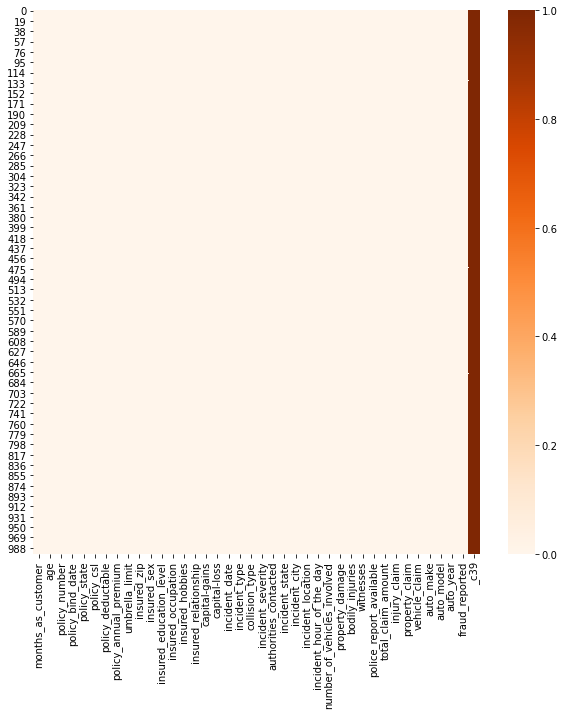

In [11]:
#checking null values in dataset using dataset
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap='Oranges');

In [13]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 variable is Empty column so , drop _c39 column(variable)

In [14]:
#drop _c39 drop column
df.drop('_c39',inplace=True,axis=1)

In [16]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

###### Observations:-

1. RangeIndex: 1000 entries, 0 to 999
2. Data columns (total 39 columns)
3. There is no null values in dataset
4. dtypes: float64(1 variable), int64(17 variables), object(21 variables) 
5. memory usage: 304.8+ KB

In [17]:
#dataset describle
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [18]:
#All variables unique counts
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [125]:
#drop policy_number bcz each number is uniquee for all customers
df.drop('policy_number',axis=1,inplace=True)

In [126]:
#drop incident_location bcz each location is uniquee for all customers
df.drop('incident_location',axis=1,inplace=True)

### More Details About Columns

In [22]:
#uniques of variables
print(df['age'].unique())
#unique counts
print(df['age'].value_counts())

[48 42 29 41 44 39 34 37 33 61 23 38 58 26 31 62 55 40 35 43 45 25 30 28
 49 54 47 59 27 56 32 36 64 60 51 46 50 57 53 24 52 19 21 63 20 22]
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64


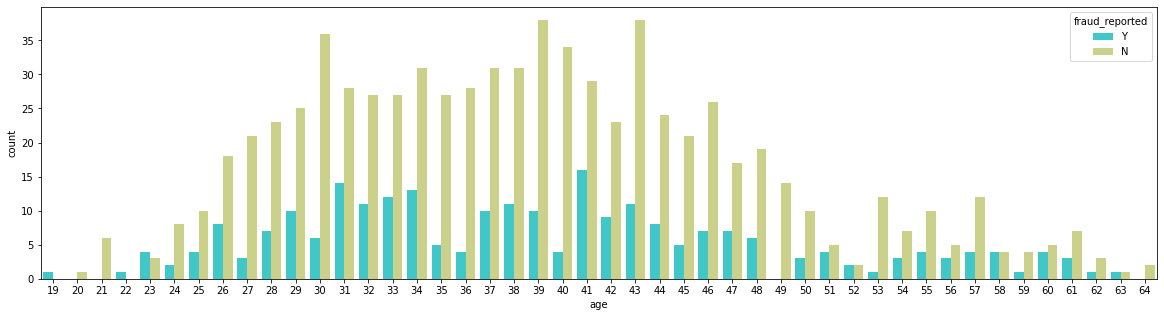

In [25]:
#count plot
plt.figure(figsize=(20,5))
sns.countplot('age',hue='fraud_reported',palette='rainbow',data=df);

Many of fraud reported in age 41

Age of below 19 is all fraud insurance claims

In [26]:
#uniques of variables
print(df['policy_state'].unique())
#unique counts
print(df['policy_state'].value_counts())

['OH' 'IN' 'IL']
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


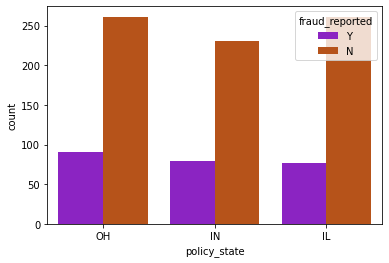

In [29]:
#count plot
sns.countplot('policy_state',hue='fraud_reported',palette='gnuplot',data=df);

In [30]:
#uniques of variables
print(df['policy_csl'].unique())
#unique counts
print(df['policy_csl'].value_counts())

['250/500' '100/300' '500/1000']
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


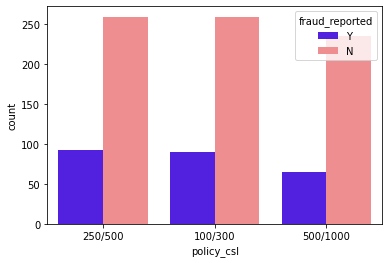

In [32]:
#count plot
sns.countplot('policy_csl',hue='fraud_reported',palette='gnuplot2',data=df);

In [ ]:
#uniques of variables
print(df['policy_deductable'].unique())
#unique counts
print(df['policy_deductable'].value_counts())

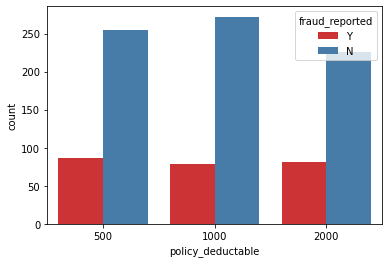

In [33]:
#count plot
sns.countplot('policy_deductable',hue='fraud_reported',palette='Set1',data=df);

In [ ]:
#uniques of variables
print(df['umbrella_limit'].unique())
#unique counts
print(df['umbrella_limit'].value_counts())

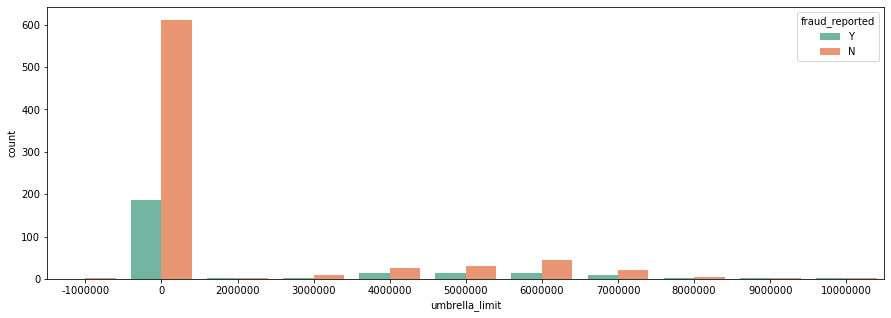

In [35]:
#count plot
plt.figure(figsize=(15,5))
sns.countplot('umbrella_limit',hue='fraud_reported',palette='Set2',data=df);

In [ ]:
#uniques of variables
print(df['insured_sex'].unique())
#unique counts
print(df['insured_sex'].value_counts())

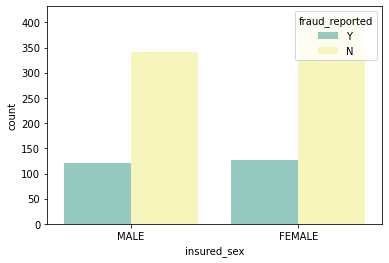

In [36]:
#count plot
sns.countplot('insured_sex',hue='fraud_reported',palette='Set3',data=df);

In [37]:
#uniques of variables
print(df['insured_education_level'].unique())
#unique counts
print(df['insured_education_level'].value_counts())

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


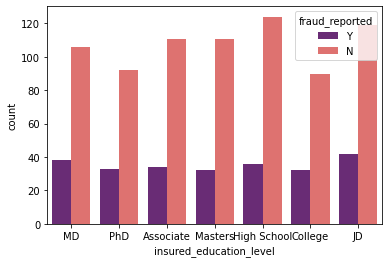

In [38]:
#count plot
sns.countplot('insured_education_level',hue='fraud_reported',palette='magma',data=df);

In [40]:
#uniques of variables
print(df['insured_occupation'].unique())
#unique counts
print(df['insured_occupation'].value_counts())

['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


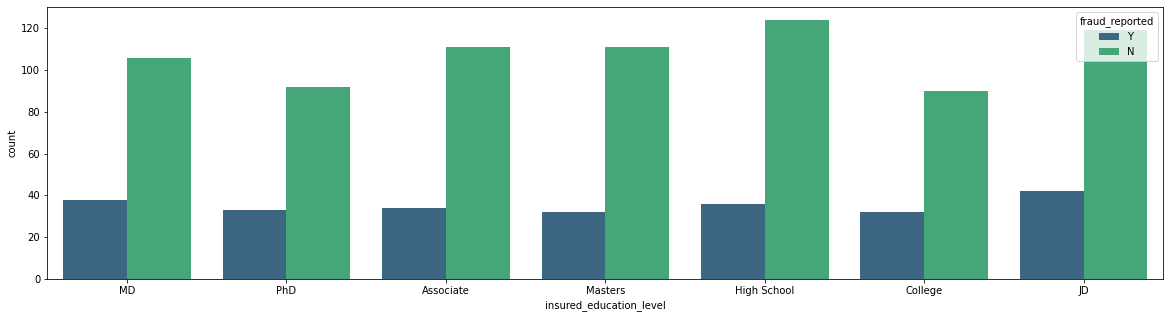

In [43]:
#count plot
plt.figure(figsize=(20,5))
sns.countplot('insured_education_level',hue='fraud_reported',palette='viridis',data=df);

In [45]:
#uniques of variables
print(df['insured_hobbies'].unique())
#unique counts
print(df['insured_hobbies'].value_counts())

['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


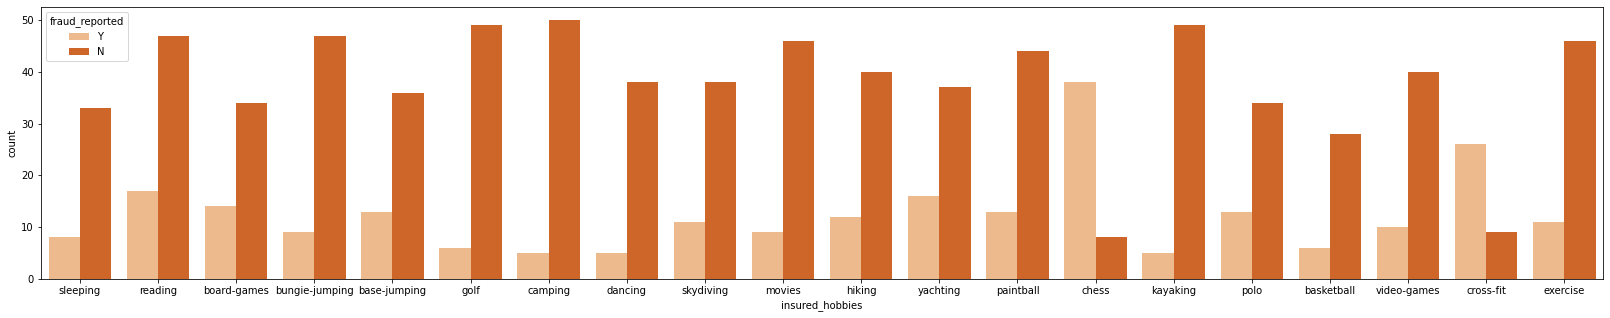

In [48]:
#count plot
plt.figure(figsize=(28,5))
sns.countplot('insured_hobbies',hue='fraud_reported',palette='Oranges',data=df);

In [51]:
#uniques of variables
print(df['insured_relationship'].unique())
#unique counts
print(df['insured_relationship'].value_counts())

['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


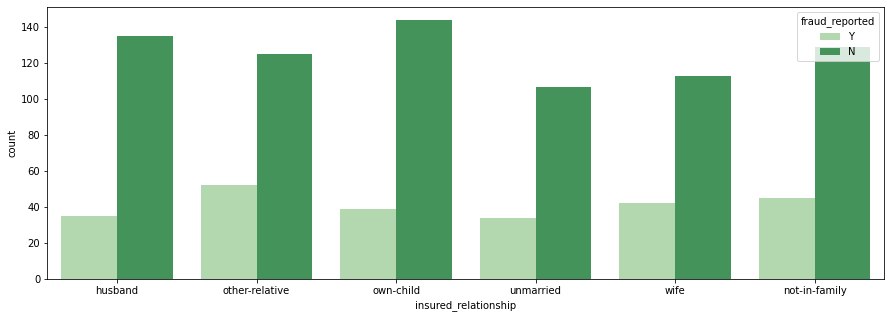

In [52]:
#count plot
plt.figure(figsize=(15,5))
sns.countplot('insured_relationship',hue='fraud_reported',palette='Greens',data=df);

In [53]:
#uniques of variables
print(df['incident_type'].unique())
#unique counts
print(df['incident_type'].value_counts())

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


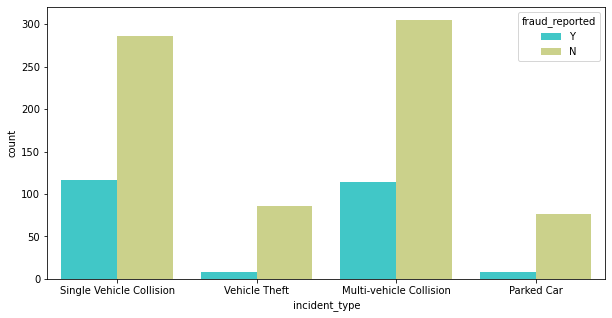

In [55]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('incident_type',hue='fraud_reported',palette='rainbow',data=df);

In [56]:
#uniques of variables
print(df['collision_type'].unique())
#unique counts
print(df['collision_type'].value_counts())

['Side Collision' '?' 'Rear Collision' 'Front Collision']
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


###### Filling ? with Most frequent value

In [57]:
df['collision_type']=df['collision_type'].replace('?','Rear Collision')

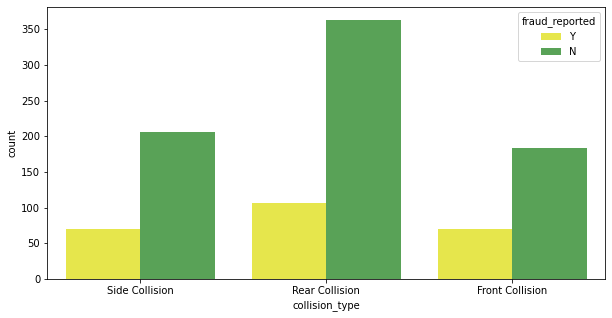

In [60]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('collision_type',hue='fraud_reported',palette='Set1_r',data=df);

In [61]:
#uniques of variables
print(df['incident_severity'].unique())
#unique counts
print(df['incident_severity'].value_counts())

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


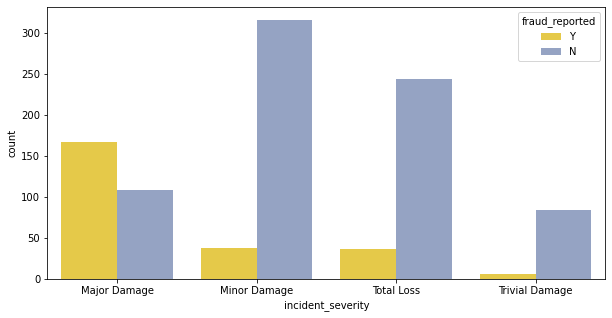

In [63]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('incident_severity',hue='fraud_reported',palette='Set2_r',data=df);

In [64]:
#uniques of variables
print(df['authorities_contacted'].unique())
#unique counts
print(df['authorities_contacted'].value_counts())

['Police' 'None' 'Fire' 'Other' 'Ambulance']
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


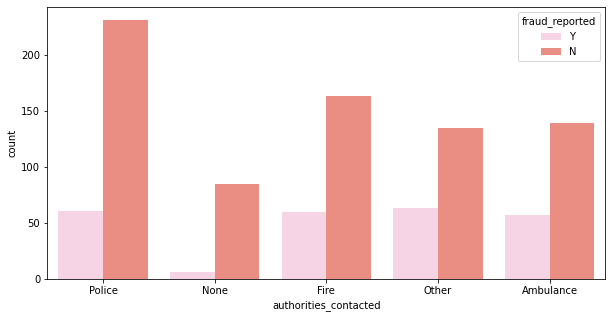

In [66]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('authorities_contacted',hue='fraud_reported',palette='Set3_r',data=df);

In [67]:
#uniques of variables
print(df['incident_state'].unique())
#unique counts
print(df['incident_state'].value_counts())

['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


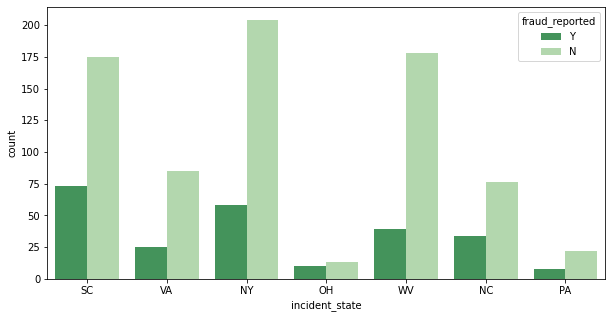

In [68]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('incident_state',hue='fraud_reported',palette='Greens_r',data=df);

In [69]:
#uniques of variables
print(df['incident_city'].unique())
#unique counts
print(df['incident_city'].value_counts())

['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


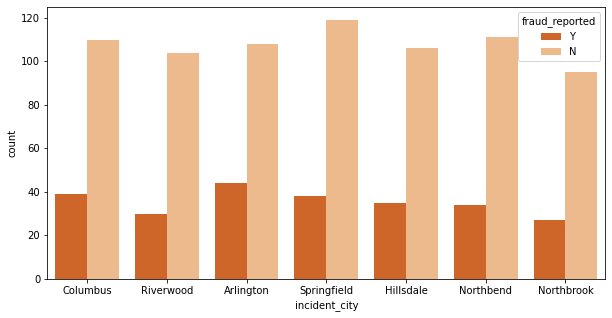

In [70]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('incident_city',hue='fraud_reported',palette='Oranges_r',data=df);

In [72]:
#uniques of variables
print(df['incident_hour_of_the_day'].unique())
#unique counts
print(df['incident_hour_of_the_day'].value_counts())

[ 5  8  7 20 19  0 23 21 14 22  9 12 15  6 16  4 10  1 17  3 11 13 18  2]
17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


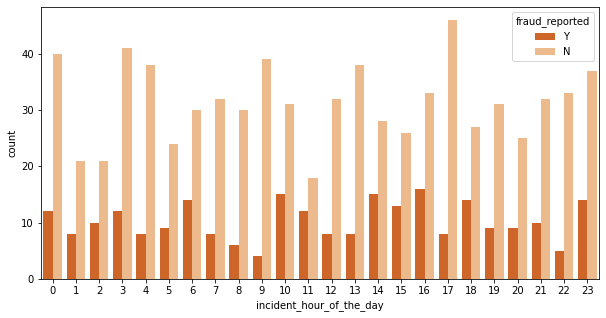

In [73]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('incident_hour_of_the_day',hue='fraud_reported',palette='Oranges_r',data=df);

In [74]:
#uniques of variables
print(df['number_of_vehicles_involved'].unique())
#unique counts
print(df['number_of_vehicles_involved'].value_counts())

[1 3 4 2]
1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


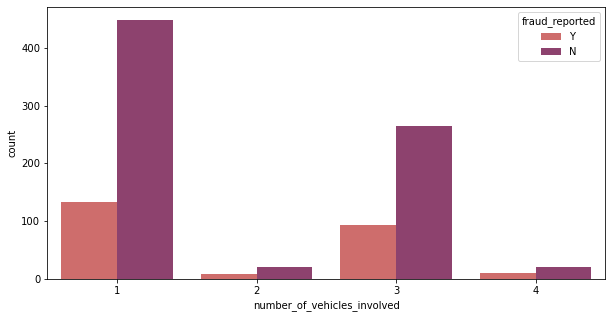

In [76]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('number_of_vehicles_involved',hue='fraud_reported',palette='flare',data=df);

In [ ]:
#uniques of variables
print(df['property_damage'].unique())
#unique counts
print(df['property_damage'].value_counts())

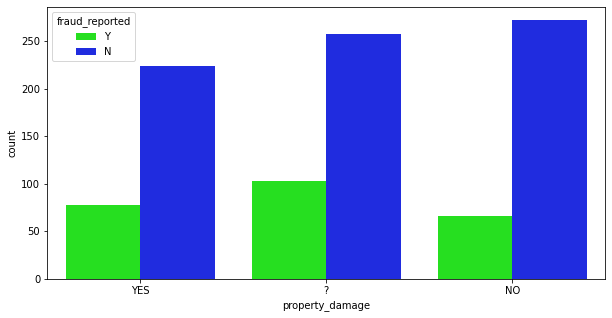

In [77]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('property_damage',hue='fraud_reported',palette='hsv',data=df);

In [78]:
#uniques of variables
print(df['bodily_injuries'].unique())
#unique counts
print(df['bodily_injuries'].value_counts())

[1 0 2]
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


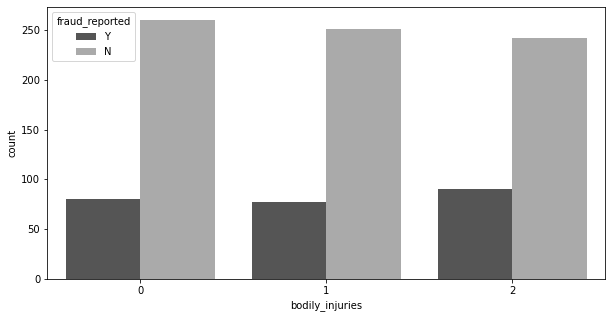

In [79]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('bodily_injuries',hue='fraud_reported',palette='gray',data=df);

In [80]:
#uniques of variables
print(df['witnesses'].unique())
#unique counts
print(df['witnesses'].value_counts())

[2 0 3 1]
1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


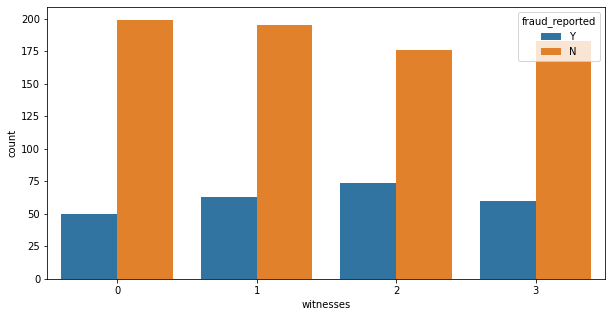

In [83]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('witnesses',hue='fraud_reported',palette='tab10',data=df);

In [84]:
#uniques of variables
print(df['police_report_available'].unique())
#unique counts
print(df['police_report_available'].value_counts())

['YES' '?' 'NO']
?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


###### Filling ? with Most frequent

In [85]:
df['police_report_available']=df['police_report_available'].replace('?','NO')

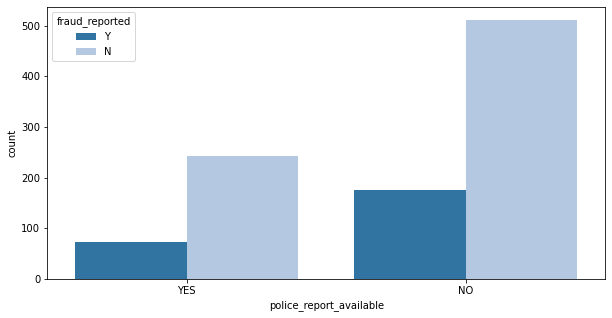

In [88]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot('police_report_available',hue='fraud_reported',palette='tab20',data=df);

In [93]:
#uniques of variables
print(df['auto_make'].unique())
#unique counts
print(df['auto_make'].value_counts())

['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']
Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


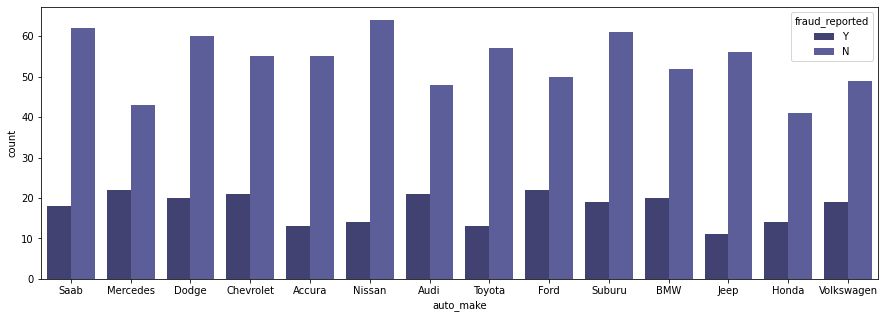

In [95]:
#count plot
plt.figure(figsize=(15,5))
sns.countplot('auto_make',hue='fraud_reported',palette='tab20b',data=df);

In [96]:
#uniques of variables
print(df['auto_model'].unique())
#unique counts
print(df['auto_model'].value_counts())

['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
E400              27
95                27
F150              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
Corolla           20
Impreza           20
ML350             20
CRV               20
TL 

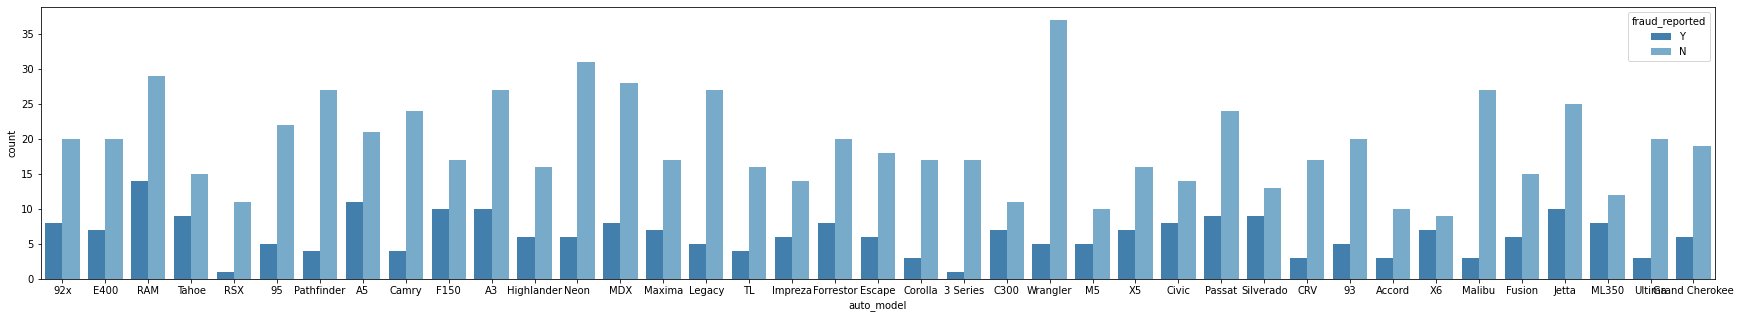

In [99]:
#count plot
plt.figure(figsize=(30,5))
sns.countplot('auto_model',hue='fraud_reported',palette='tab20c',data=df);

In [100]:
#uniques of variables
print(df['auto_year'].unique())
#unique counts
print(df['auto_year'].value_counts())

[2004 2007 2014 2009 2003 2012 2015 1996 2002 2006 2000 2010 1999 2011
 2005 2008 1995 2001 1998 1997 2013]
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


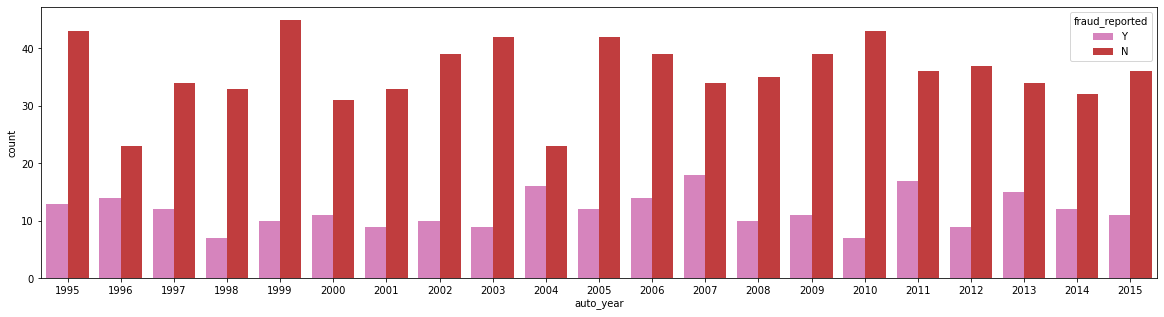

In [102]:
#count plot
plt.figure(figsize=(20,5))
sns.countplot('auto_year',hue='fraud_reported',palette='tab10_r',data=df);

In [103]:
#uniques of variables
print(df['fraud_reported'].unique())
#unique counts
print(df['fraud_reported'].value_counts())

['Y' 'N']
N    753
Y    247
Name: fraud_reported, dtype: int64


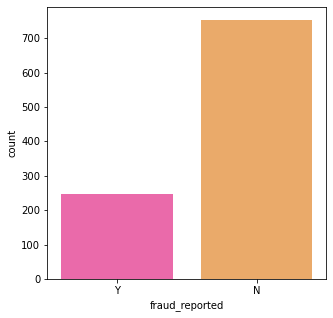

In [106]:
#count plot
plt.figure(figsize=(5,5))
sns.countplot('fraud_reported',palette='spring',data=df);

In [107]:
#This is target variable so change object to integer
df['fraud_reported']=df['fraud_reported'].replace('Y',1)
df['fraud_reported']=df['fraud_reported'].replace('N',0)

### Now Apply Label Encoder to change Object variables into Integers

In [109]:
from sklearn.preprocessing import LabelEncoder

In [127]:
#removing target variable
df1=df.drop('fraud_reported',axis=1)

In [128]:
df1=df1.apply(LabelEncoder().fit_transform)

In [129]:
df1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,532,2,1,1,732,1,486,1,4,2,17,0,187,353,49,2,2,0,4,4,1,5,0,2,1,2,1,563,258,512,545,10,1,9
1,212,23,821,1,1,2,396,5,519,1,4,6,15,2,0,353,41,3,1,1,4,5,5,8,0,0,0,0,0,44,46,45,38,8,12,12
2,123,10,186,2,0,2,740,5,6,0,6,11,2,3,63,353,44,0,1,1,4,1,1,7,2,1,2,3,0,143,337,104,116,4,30,12
3,239,22,766,0,1,2,743,6,812,0,6,1,2,4,153,98,19,2,0,0,4,2,0,5,0,0,1,2,0,451,245,249,521,3,34,19
4,212,25,181,0,2,1,902,6,850,1,0,11,2,4,265,211,34,3,1,1,2,1,0,20,0,1,0,1,0,81,70,36,66,0,31,14


In [130]:
#adding target variable
df1['fraud_reported']=df['fraud_reported']

### Hist Plot

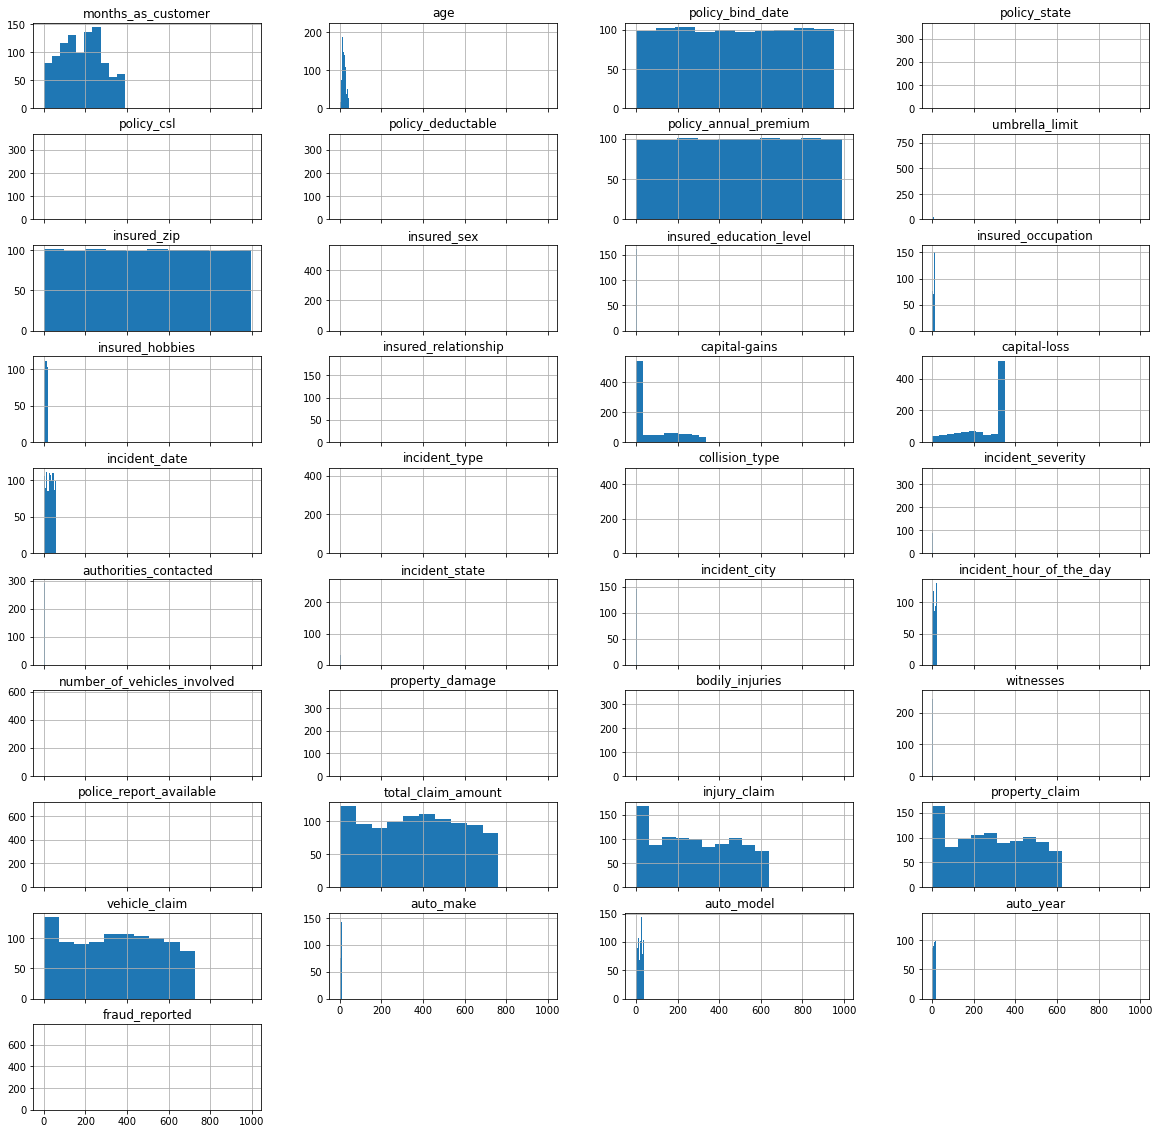

In [145]:
df1.hist(figsize=(20,20),sharex=True,layout=(10,4));

###### Checking Correlation b/w Variables

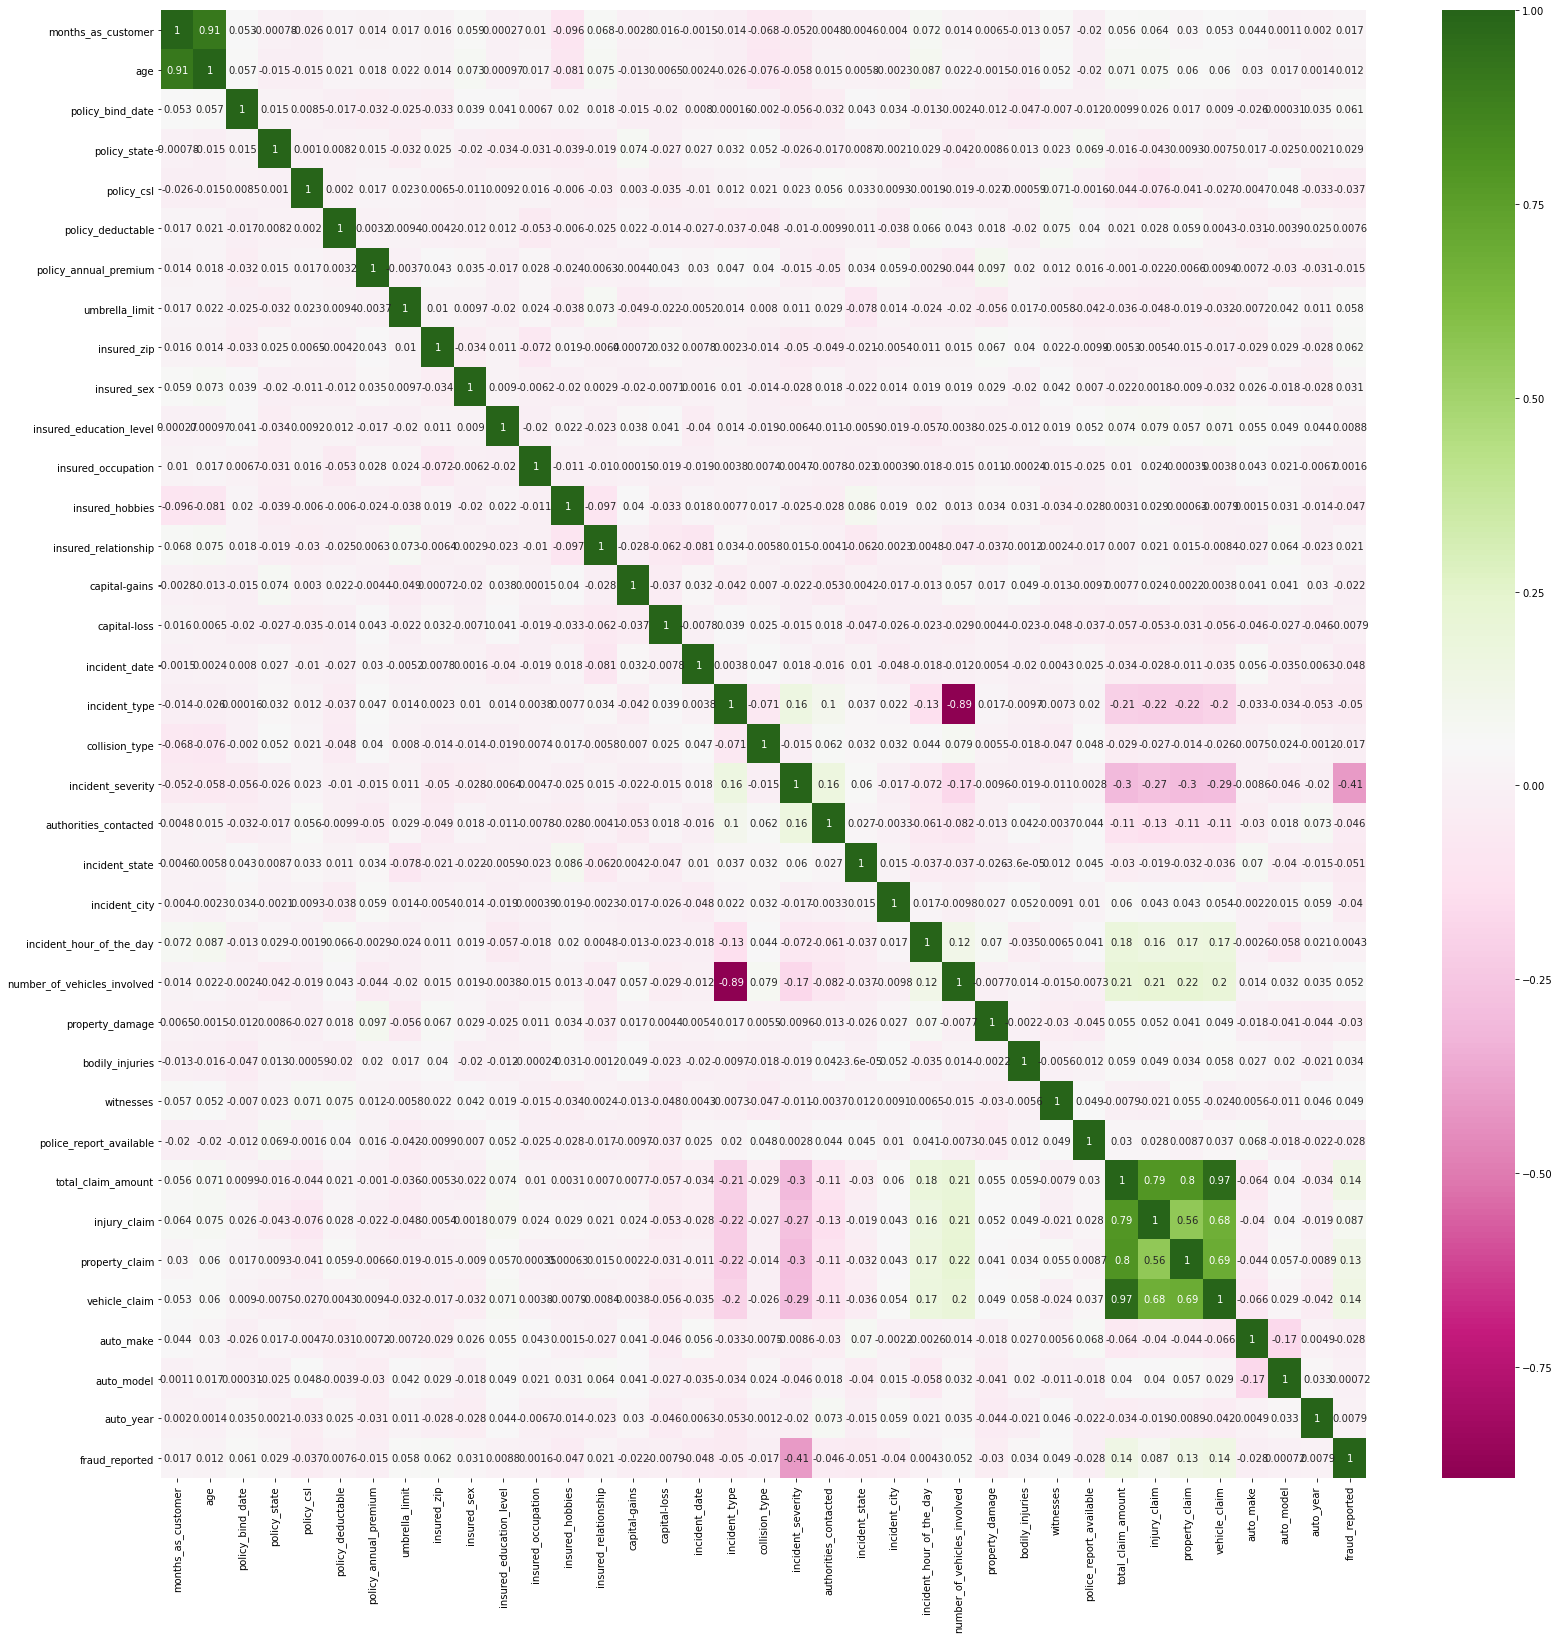

In [146]:
#checking correlation using heatmap
plt.figure(figsize=(27,27))
sns.heatmap(df1.corr(),cmap='PiYG',annot=True);

In [147]:
#checking correlation
df1.corr()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911296,0.053206,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.015904,0.059153,0.000265,0.010330,-0.096075,0.067755,-0.002832,0.015991,-0.001464,-0.014053,-0.068367,-0.052274,0.004792,0.004622,0.004008,0.072231,0.014040,0.006509,-0.012533,0.057284,-0.020217,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.002020,0.017095
age,0.911296,1.000000,0.056538,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.013517,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.012514,0.006513,0.002416,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.001486,-0.015679,0.052359,-0.020441,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.001354,0.012143
policy_bind_date,0.053206,0.056538,1.000000,0.015289,0.008486,-0.016906,-0.032003,-0.024888,-0.032670,0.039338,0.040606,0.006720,0.020085,0.017710,-0.014740,-0.019828,0.008022,0.000164,-0.002038,-0.055760,-0.032065,0.043035,0.034437,-0.012582,-0.002381,-0.011615,-0.046970,-0.007004,-0.011563,0.009868,0.026021,0.016972,0.009028,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000783,-0.014533,0.015289,1.000000,0.001027,0.008213,0.014751,-0.031793,0.025074,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074460,-0.027070,0.027287,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,0.008623,0.013384,0.022960,0.069017,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026295,-0.015185,0.008486,0.001027,1.000000,0.001986,0.017161,0.022779,0.006474,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.002968,-0.035136,-0.010140,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,-0.001645,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.016873,0.020561,-0.016906,0.008213,0.001986,1.000000,0.003182,0.009402,-0.004227,-0.011948,0.012000,-0.053245,-0.006006,-0.025468,0.022064,-0.013690,-0.027445,-0.036759,-0.048201,-0.010001,-0.009862,0.010650,-0.038425,0.066442,0.043148,0.018326,-0.020129,0.074994,0.040129,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.014294,0.017822,-0.032003,0.014751,0.017161,0.003182,1.000000,-0.003712,0.043082,0.034839,-0.016601,0.028204,-0.023982,0.006295,-0.004442,0.042620,0.030231,0.047205,0.039759,-0.014801,-0.049962,0.033840,0.059491,-0.002900,-0.043527,0.097022,0.020450,0.012004,0.016026,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.031015,-0.015261
umbrella_limit,0.017145,0.021924,-0.024888,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.010062,0.009733,-0.019668,0.024072,-0.037534,0.073487,-0.049076,-0.021814,-0.005248,0.013614,0.008032,0.011335,0.029204,-0.078174,0.013945,-0.024305,-0.019524,-0.055814,0.016680,-0.005779,-0.042278,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.010528,0.057719
insured_zip,0.015904,0.013517,-0.032670,0.025074,0.006474,-0.004227,0.043082,0.010062,1.000000,-0.034313,0.010645,-0.071785,0.018891,-0.006365,0.000722,0.031819,0.007767,0.002322,-0.014469,-0.050411,-0.048834,-0.021164,-0.005438,0.010707,0.014780,0.066836,0.040152,0.022141,-0.009889,-0.005345,-0.005417,-0.014892,-0.017019,-0.028966,0.029470,-0.027803,0.061767
insured_sex,0.059153,0.073337,0.039338,-0.020481,-0.010757,-0.011948,0.034839,0.009733,-0.034313,1.000000,0.009002,-0.006160,-0.020317,0.002855

###### Observations:-

1. incident_type variable is High Negative Correlation with number_of_vehicles_involved variable
2. incident_type variable is Negative Correlation with 'total_claim_amount', 'injury_claim','property_claim' and 'vehicle_claim' variables
3. incident_severity variable is Negative Correlation with 'total_claim_amount', 'injury_claim','property_claim' and 'vehicle_claim' variables
4. incident_hour_of_the_day is Negative Correlation with 'total_claim_amount', 'injury_claim','property_claim' and 'vehicle_claim' variables
5. number_of_vehicles_involved is Negative Correlation with number_of_vehicles_involved 'total_claim_amount', 'injury_claim','property_claim' and 'vehicle_claim' variables
6. 'total_claim_amount', 'injury_claim','property_claim' and 'vehicle_claim' variables are Good correlaton (Positive)correlation with each other.

In [149]:
#correlation target variable to other variables(Input variables)
df_target=df1.corr()
df_target['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.144769
total_claim_amount             0.140553
property_claim                 0.133952
injury_claim                   0.086889
insured_zip                    0.061767
policy_bind_date               0.060642
umbrella_limit                 0.057719
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.017095
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
policy_deductable              0.007620
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.007930
policy_annual_premium         -0.015261
collision_type                -0.017315


vehicle_claim,total_claim_amount and property_claim variables are Positive Correlation with Target variable 

incident_severity variable high Negative correlation with Target variable

In [150]:
#incident_severity is high Negative correlation so , drop incident_severity
df1.drop('incident_severity',axis=1,inplace=True)

### Apply SMOTE

In [178]:
#Apply SMOTE because dataset is imbalanced
from imblearn.over_sampling import SMOTE

In [180]:
smt=SMOTE()

In [179]:
dfx=df1.drop('fraud_reported',axis=1)
dfy=df1['fraud_reported']

In [181]:
train_x,train_y=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

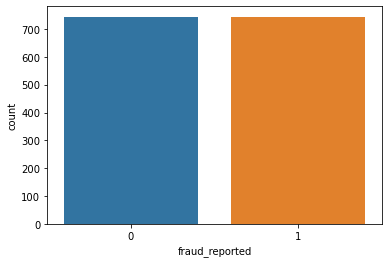

In [182]:
#count plot
sns.countplot(train_y)

In [183]:
df1=train_x

In [185]:
#add target variable
df1['fraud_reported']=train_y

### checking outliers

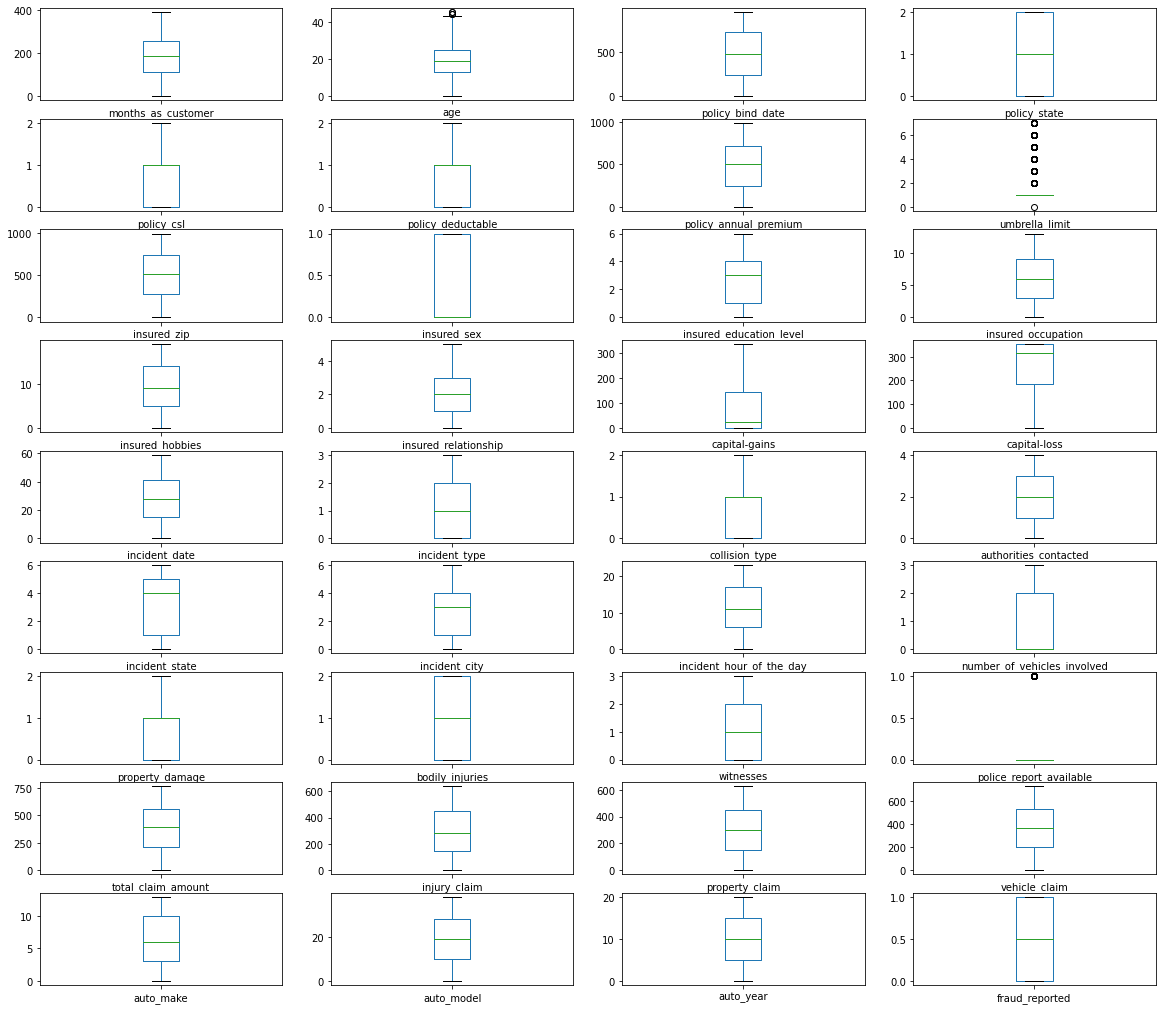

In [186]:
df1.plot(kind='box',subplots=True,layout=(10,4),figsize=(20,20));

In [187]:
#removing outliers
from scipy.stats import zscore

In [188]:
z=np.abs(zscore(df1))

In [189]:
threshold=3
print(np.where(z>3))

(array([  48,   64,  149,  152,  156,  178,  179,  180,  197,  221,  250,
        257,  342,  359,  387,  465,  509,  531,  609,  647,  653,  663,
        779,  782,  783,  801,  823,  836,  922, 1394], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7], dtype=int64))


In [190]:
z[48][7]

3.3066588555595358

In [191]:
df_new=df1[(z<3).all(axis=1)]

In [192]:
df1=df_new

In [193]:
#checking shape of dataset after removing outliers
df1.shape

(1458, 36)

1458 rows and 36 columns

### Checking skewness 

In [205]:
x=df1.drop('fraud_reported',axis=1)

In [206]:
y=df1['fraud_reported']

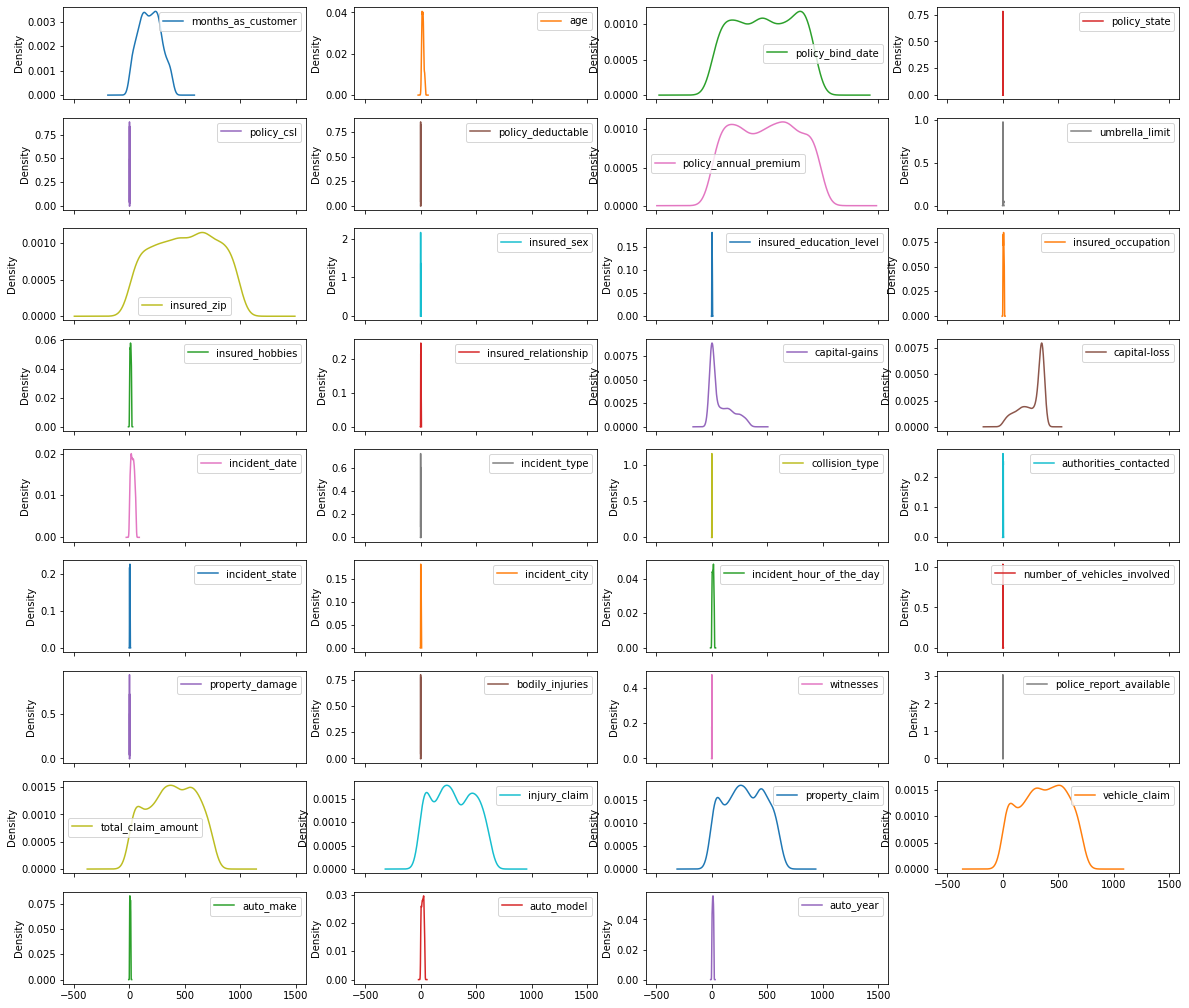

In [196]:
x.plot(kind='density',subplots=True,layout=(10,4),figsize=(20,20));

In [197]:
#checking skewness
x.skew().sort_values(ascending=False)

umbrella_limit                 2.097819
police_report_available        1.218463
capital-gains                  0.982843
number_of_vehicles_involved    0.611503
age                            0.471192
insured_sex                    0.465214
property_damage                0.372879
policy_csl                     0.309841
policy_deductable              0.262317
incident_type                  0.246965
bodily_injuries                0.180520
incident_city                  0.175316
insured_relationship           0.168614
collision_type                 0.161377
policy_state                   0.146266
witnesses                      0.125390
incident_date                  0.103727
months_as_customer             0.092216
injury_claim                   0.059263
insured_education_level        0.046479
insured_occupation             0.044174
auto_make                      0.033198
authorities_contacted          0.026215
insured_hobbies                0.014600
incident_hour_of_the_day       0.009648


In [198]:
#removing skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [207]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [208]:
data=pipe.fit_transform(x)

In [209]:
#make dataset
x=pd.DataFrame(data,columns=x.columns)

### VIF(Variance Inflation Factor)

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [213]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [214]:
vif()

,Variables,VIF Factor
0,months_as_customer,6.045957
1,age,6.074475
2,policy_bind_date,1.039003
3,policy_state,1.070863
4,policy_csl,1.053525
5,policy_deductable,1.054950
6,policy_annual_premium,1.064038
7,umbrella_limit,1.036491
8,insured_zip,1.064230
9,insured_sex,1.058675


In [215]:
#months_as_customer and age variables is Same VIF Factor so drop one variable
x.drop('months_as_customer',axis=1,inplace=True)
#injury_claim and property_claim variables are same vif factor so drop one variable
x.drop('injury_claim',axis=1,inplace=True)
#auto_make , auto_year and auto_model variables are same vif factor so drop two variable
x.drop('auto_model',axis=1,inplace=True)
x.drop('auto_year',axis=1,inplace=True)
#incident_type and number_of_vehicles_involved variables are same vif factor so drop one variable
x.drop('number_of_vehicles_involved',axis=1,inplace=True)
#umbrella_limit, policy_bind_date and insured_occupation are same vif factors so frop two variables
x.drop('umbrella_limit',axis=1,inplace=True)
x.drop('policy_bind_date',axis=1,inplace=True)

### Standard Scale

In [216]:
scale=MinMaxScaler()

In [217]:
x=scale.fit_transform(x)

In [218]:
x.shape

(1458, 28)

In [219]:
y.shape

(1458,)

### Model selection

In [220]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve

In [221]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [222]:
models_list=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

### LogisticRegression

In [223]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [224]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.773972602739726 Maximum Random Number:- 37


accuracy_score:- 0.773972602739726
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       137
           1       0.79      0.78      0.79       155

    accuracy                           0.77       292
   macro avg       0.77      0.77      0.77       292
weighted avg       0.77      0.77      0.77       292



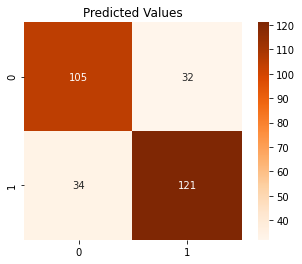

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=37)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

### GaussianNB

In [256]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Greens',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [227]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8013698630136986 Maximum Random Number:- 83


accuracy_score:- 0.8013698630136986
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       142
           1       0.79      0.83      0.81       150

    accuracy                           0.80       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.80      0.80      0.80       292



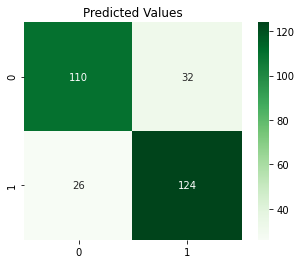

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=83)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

### DecisionTreeClassifier

In [229]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Blues',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [234]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.7773972602739726 Maximum Random Number:- 37


accuracy_score:- 0.7568493150684932
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       134
           1       0.78      0.76      0.77       158

    accuracy                           0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292



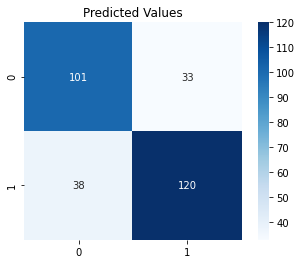

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=37)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

### KNeighborsClassifier

In [236]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Reds',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [237]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.7534246575342466 Maximum Random Number:- 85


accuracy_score:- 0.7534246575342466
              precision    recall  f1-score   support

           0       0.52      0.94      0.67        77
           1       0.97      0.69      0.80       215

    accuracy                           0.75       292
   macro avg       0.74      0.81      0.74       292
weighted avg       0.85      0.75      0.77       292



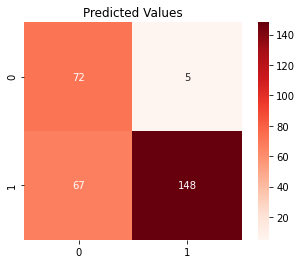

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=85)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

### Support Vector Classifier

In [239]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='crest',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [240]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8424657534246576 Maximum Random Number:- 24


accuracy_score:- 0.8424657534246576
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       147
           1       0.83      0.86      0.84       145

    accuracy                           0.84       292
   macro avg       0.84      0.84      0.84       292
weighted avg       0.84      0.84      0.84       292



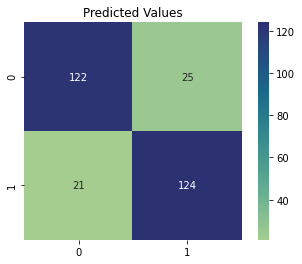

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=24)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

### RandomForestClassifier

In [242]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='viridis',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [243]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8767123287671232 Maximum Random Number:- 37


accuracy_score:- 0.8595890410958904
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       156
           1       0.81      0.91      0.86       136

    accuracy                           0.86       292
   macro avg       0.86      0.86      0.86       292
weighted avg       0.87      0.86      0.86       292



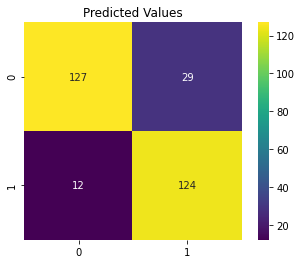

In [244]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=37)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

### GradientBoostingClassifier

In [245]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='pink',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [246]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8424657534246576 Maximum Random Number:- 37


accuracy_score:- 0.8424657534246576
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       141
           1       0.84      0.85      0.85       151

    accuracy                           0.84       292
   macro avg       0.84      0.84      0.84       292
weighted avg       0.84      0.84      0.84       292



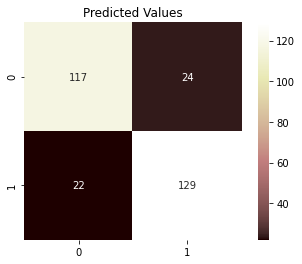

In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=37)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

### AdaBoostClassifier

In [248]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='icefire',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [249]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8082191780821918 Maximum Random Number:- 42


accuracy_score:- 0.8082191780821918
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       138
           1       0.82      0.81      0.82       154

    accuracy                           0.81       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.81      0.81      0.81       292



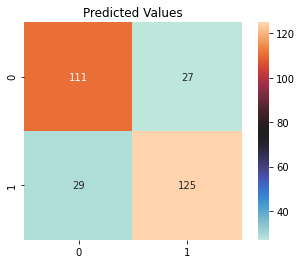

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

### Cross Validation

In [252]:
for i in range(4,11):
    print('CV:-',i)
    print('---->------>------>----->----->------>------>------->---->----->')
    for model in models_list:
        score=cross_val_score(model,x,y,cv=i)
        print(model)
        print(score)
        print(score.mean())
    print('---->------>------>----->----->------>------>------->---->----->')

CV:- 4
---->------>------>----->----->------>------>------->---->----->
LogisticRegression()
[0.52876712 0.71780822 0.74450549 0.78846154]
0.6948855938581966
GaussianNB()
[0.52876712 0.7369863  0.78846154 0.7967033 ]
0.7127295649555923
DecisionTreeClassifier()
[0.56438356 0.70136986 0.71428571 0.77747253]
0.689377916603944
KNeighborsClassifier()
[0.64109589 0.65753425 0.72527473 0.73076923]
0.6886685232575643
SVC()
[0.56986301 0.80821918 0.87087912 0.87637363]
0.7813337347583923
RandomForestClassifier()
[0.60273973 0.83835616 0.88736264 0.8956044 ]
0.806015730844498
GradientBoostingClassifier()
[0.54520548 0.80547945 0.86263736 0.87637363]
0.7724239801294596
AdaBoostClassifier()
[0.5260274  0.74246575 0.81043956 0.82417582]
0.7257771338250789
---->------>------>----->----->------>------>------->---->----->
CV:- 5
---->------>------>----->----->------>------>------->---->----->
LogisticRegression()
[0.53424658 0.64726027 0.75       0.75601375 0.79725086]
0.696954290825213
GaussianNB()
[

In [255]:
score=cross_val_score(rfc,x,y,cv=10)
print(rfc)
print(score)
print(score.mean())

RandomForestClassifier()
[0.65753425 0.6369863  0.65068493 0.8630137  0.9109589  0.91780822
 0.92465753 0.95205479 0.90344828 0.96551724]
0.8382664147378366


### RandomForestClassifier is the best model

accuracy_score:- 0.8458904109589042
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       152
           1       0.81      0.89      0.85       140

    accuracy                           0.85       292
   macro avg       0.85      0.85      0.85       292
weighted avg       0.85      0.85      0.85       292



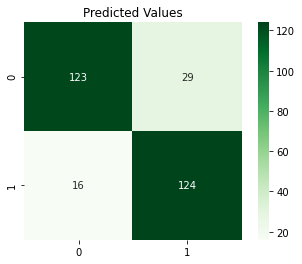

In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=37)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

### Hyperparameters for a model

In [258]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [259]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8070323059390985
Best score: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(criterion='entropy', max_features='sqrt')
Best score: 0.8173310031539802
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.8156340559774036
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.825085910652921
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best score: RandomForestClassifier(criterion='entropy', max_features='log2')
Best score: 0.8353448009316995
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.8250354274917336
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.8284701517259656
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClass

In [260]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=7)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8310521813515825
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()


### ROC Curve

In [261]:
pred_prob=rfc.predict_proba(x_test)

In [262]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=2

In [263]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

In [265]:
sns.set_theme()

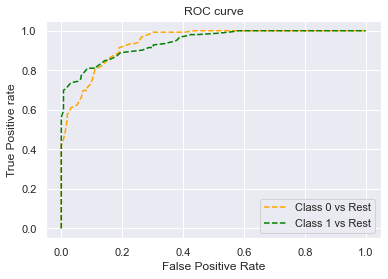

In [266]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC curve',dpi=300); 

### Save the model

In [267]:
import joblib

In [268]:
#save the model
joblib.dump(rfc,'insurance_claims_rfc.obj')

['insurance_claims_rfc.obj']

In [269]:
#load the model
loaded_model=joblib.load('insurance_claims_rfc.obj')

In [270]:
#check the model is working or not
loaded_model.predict(x_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)